<a href="https://colab.research.google.com/github/femketenharkel/Predicting_Ratings/blob/main/models/clustering/K-Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means clustering

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import joblib

In [2]:
# Load in the data
drive.mount('/content/drive')
df_final = pd.read_csv('/content/drive/My Drive/Thesis/Data/df_final.csv')

Mounted at /content/drive


In [3]:
# Exclude target variable and unique identifiers for clustering.
df = df_final.drop(columns= ['Rating', 'MovieID', 'UserID'])

In [ ]:
# Normalize the numerical features
scaler = MinMaxScaler()
features_to_scale = ['Year', 'Month', 'Day', 'Hour', 'Age', 'Release_year',
                       'Time_release_to_rating', 'Total_ratings_per_movie',
                       'Total_ratings_per_user' ]
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

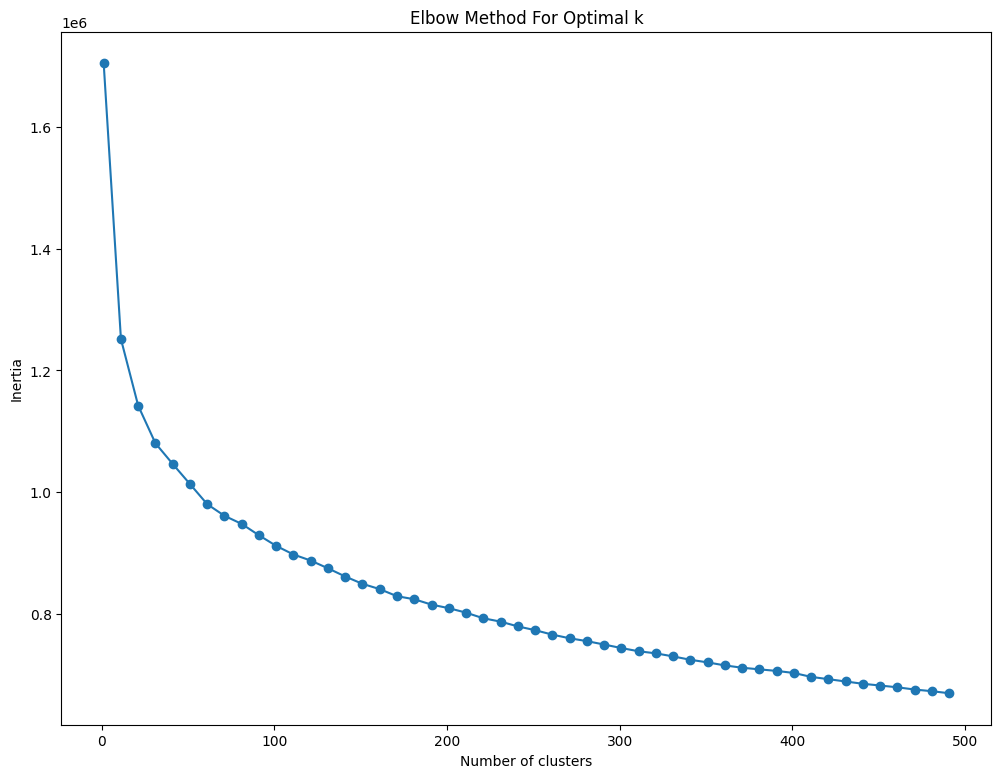

In [ ]:
# Decide on cluster size using the Elbow method

# Range of clusters to evaluate
cluster_range = range(1, 500, 10)
inertia = []

# Calculate the within-cluster sum of squares for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot the results to find the elbow point
plt.figure(figsize=(12, 9))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Determine Silhouette score for optimal k
optimal_k = 400

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df)

# Assign cluster labels to df_final (not normalized, as input for
# supervised learning)
labels = kmeans.labels_
df['cluster'] = labels

# Calculate silhouette score
silhouette_avg = silhouette_score(df, labels)

print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

Silhouette Score for 400 clusters: 0.3829503558451258


In [ ]:
df_final['cluster'] = labels

In [ ]:
df_final.to_csv('/content/drive/My Drive/Thesis/Data/df_final_K-means_Clustering.csv', index=False)

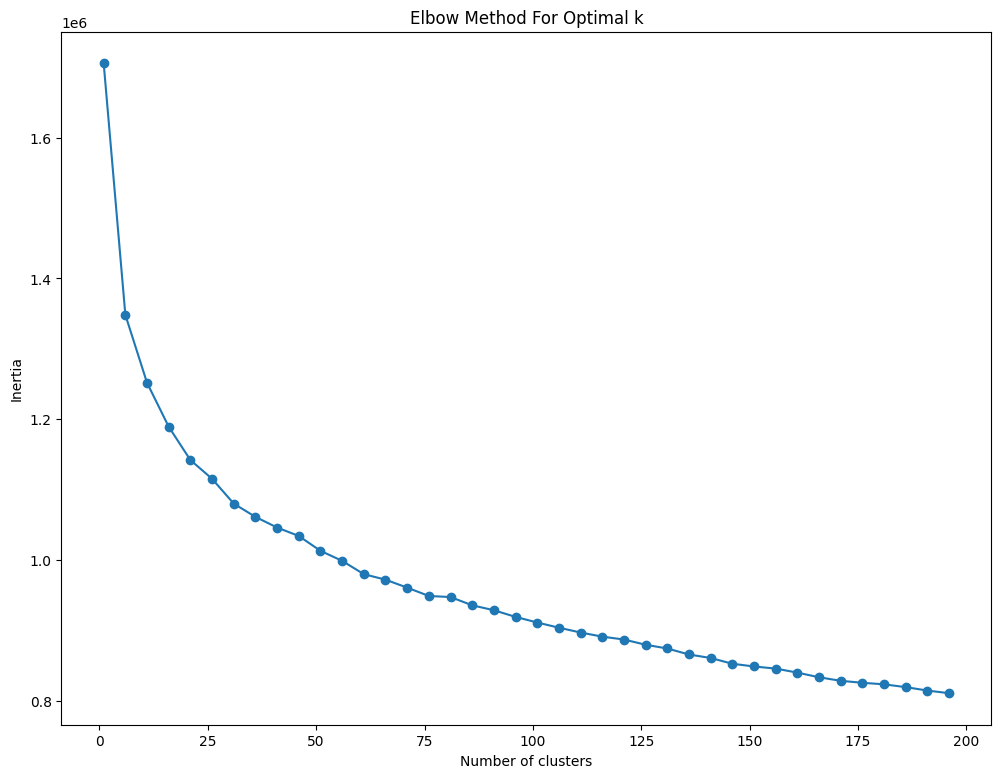

In [ ]:
# Decide on cluster size using the Elbow method

# Range of clusters to evaluate
cluster_range = range(1, 200, 5)
inertia = []

# Calculate the within-cluster sum of squares for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot the results to find the elbow point
plt.figure(figsize=(12, 9))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

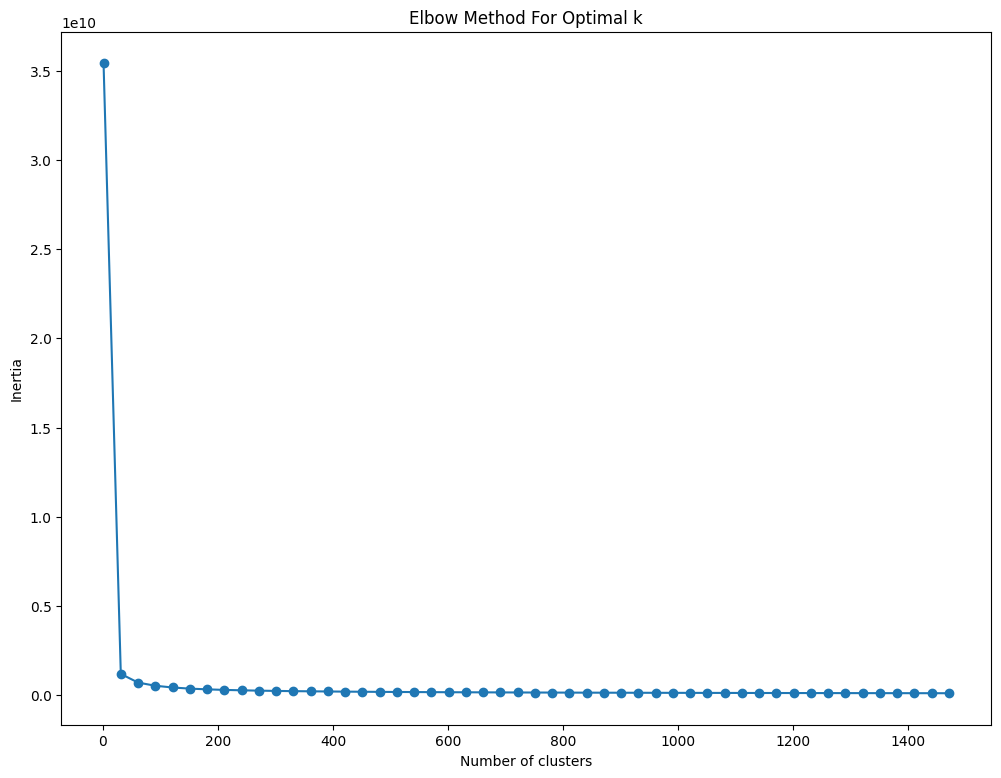

In [5]:
# Decide on cluster size using the Elbow method

# Range of clusters to evaluate
cluster_range = range(1, 1500, 30)
inertia = []

# Calculate the within-cluster sum of squares for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot the results to find the elbow point
plt.figure(figsize=(12, 9))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [6]:
# Determine Silhouette score for optimal k
optimal_k = 75

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df)

# Assign cluster labels to df_final (not normalized, as input for
# supervised learning)
labels = kmeans.labels_
df['cluster'] = labels

# Calculate silhouette score
silhouette_avg = silhouette_score(df, labels)

print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

Silhouette Score for 75 clusters: 0.32568860082479456


In [ ]:
df_final['cluster'] = labels

In [ ]:
df_final.to_csv('/content/drive/My Drive/Thesis/Data/df_final_K-means_Clustering.csv', index=False)